In [266]:
%pylab inline
%matplotlib inline
n=30
m=3
J=48

Populating the interactive namespace from numpy and matplotlib


In [267]:
weights_file = '../weight_files/jackknife_weights_n%d_m%d_j%d.dat'%(n,m,J)
RR_file='../weight_files/binned_pair_counts_n%d_m%d_j%d.dat'%(n,m,J)
EE_file = '../CovMatricesAll/EE_n%d_m%d_full.txt' %(n,m)
Cx_file = '../CovMatricesJack/cxj_n%d_m%d_full.txt' %(n,m)
C2_file = '../CovMatricesJack/c2j_n%d_m%d_full.txt' %(n,m)
C3_file = '../CovMatricesJack/c3j_n%d_m%d_full.txt' %(n,m)
C4_file = '../CovMatricesJack/c4j_n%d_m%d_full.txt' %(n,m)

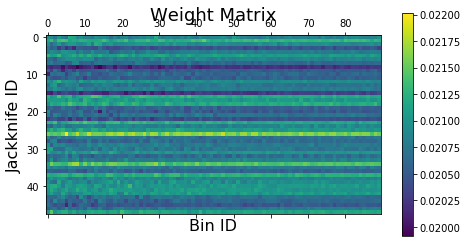

In [268]:
weights=np.loadtxt(weights_file)[:,1:]
plt.matshow(weights);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Weight Matrix',fontsize=FS+2);

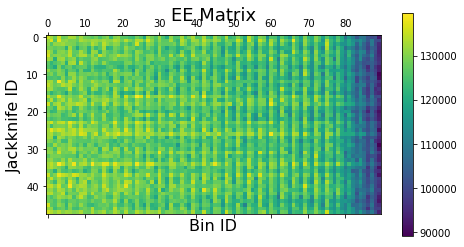

In [269]:
EEaA=np.loadtxt(EE_file)
plt.matshow(EEaA);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EE Matrix',fontsize=FS+2);

In [270]:
EEa=np.sum(EEaA,axis=0)

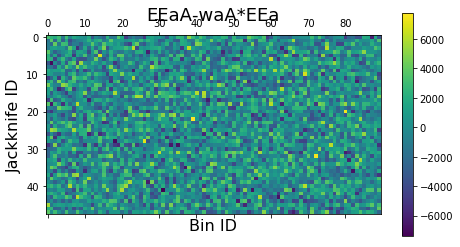

In [271]:
diffaA=EEaA-weights*EEa
plt.matshow(diffaA);FS=16;
plt.ylabel('Jackknife ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('EEaA-waA*EEa',fontsize=FS+2);

In [272]:
RRa = np.loadtxt(RR_file)
RRaRRb=np.matmul(np.asmatrix(RRa).T,np.asmatrix(RRa))
fact=np.matmul(np.asmatrix(weights).T,np.asmatrix(weights))

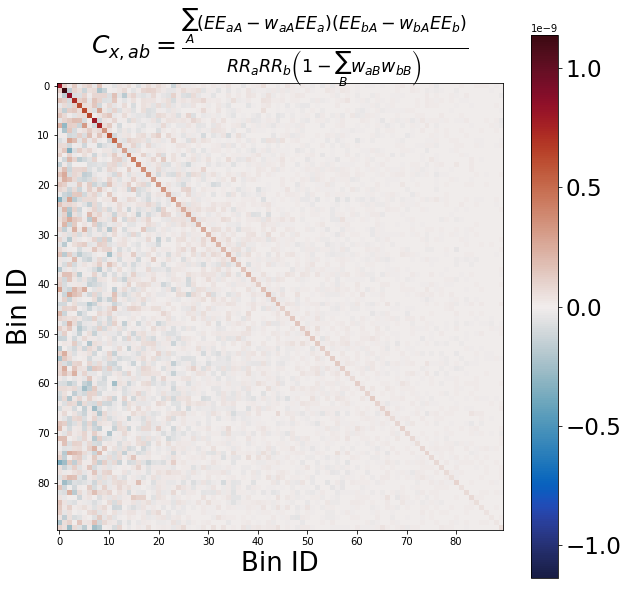

In [273]:
diff_mat=np.asarray(np.matmul(diffaA.T,diffaA)/np.matmul(fact,RRaRRb))
import cmocean
fig,ax=plt.subplots(1,figsize=(10,10))
vmax=max(diff_mat.ravel())
cax=ax.matshow(diff_mat,cmap=cmocean.cm.balance,vmax=vmax,vmin=-vmax);FS=26;
plt.gca().xaxis.tick_bottom()
ax.set_ylabel('Bin ID',fontsize=FS)
ax.set_xlabel('Bin ID',fontsize=FS)
cbar=fig.colorbar(cax);
cbar.ax.tick_params(labelsize=FS-3)
plt.title(r'$C_{x,ab}=\frac{\sum_A(EE_{aA}-w_{aA}EE_a)(EE_{bA}-w_{bA}EE_b)}{RR_aRR_b\left(1-\sum_B{w_{aB}w_{bB}}\right)}$',fontsize=FS-1);

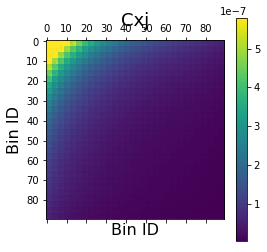

In [281]:
cxj=np.loadtxt(Cx_file)
plt.matshow(cxj,vmax=np.percentile(cxj.ravel(),99));FS=16;
plt.ylabel('Bin ID',fontsize=FS)
plt.xlabel('Bin ID',fontsize=FS)
plt.colorbar()
plt.title('Cxj',fontsize=FS+2);

(array([6593.,  886.,  295.,  142.,   84.,   45.,   28.,   10.,    8.,
           9.]),
 array([2.78981800e-09, 1.05592236e-07, 2.08394654e-07, 3.11197073e-07,
        4.13999491e-07, 5.16801909e-07, 6.19604327e-07, 7.22406745e-07,
        8.25209164e-07, 9.28011582e-07, 1.03081400e-06]),
 <a list of 10 Patch objects>)

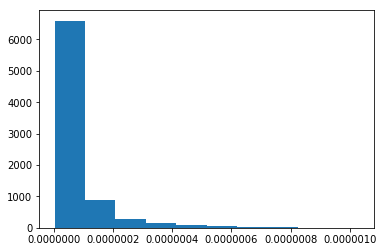

In [284]:
plt.hist(cxj.ravel())

In [276]:
c_disconn=np.zeros_like(cxj)
for a in range(len(c_disconn)):
    for b in range(len(c_disconn)):
        tmp_ab = 0.
        weights_ab = 0.
        for A in range(len(weights)):
            tmp_ab+=(EEaA[A,a]-weights[A,a]*EEa[a])*(EEaA[A,b]-weights[A,b]*EEa[b])
            weights_ab+=weights[A,a]*weights[A,b]
        c_disconn[a,b]=tmp_ab/(RRa[a]*RRa[b]*(1.-weights_ab))

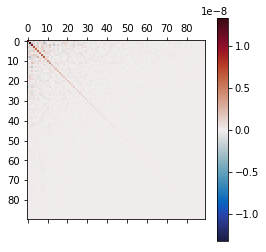

In [277]:
vmax=max(c_disconn.ravel())
plt.matshow(c_disconn,vmax=vmax,vmin=-vmax,cmap=cmocean.cm.balance)
plt.colorbar()

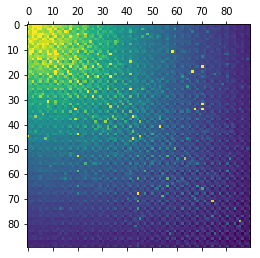

In [280]:
plt.matshow(c4j,vmax=np.percentile(c4j.ravel(),99))

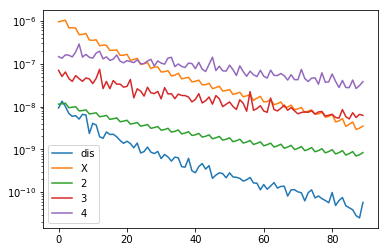

In [279]:
c2j=np.loadtxt(C2_file);
c3j=np.loadtxt(C3_file);c4j=np.loadtxt(C4_file)
plt.plot(np.diag(c_disconn),label='dis')
plt.plot(np.diag(cxj),label='X')
plt.plot(c2j,label='2')
plt.plot(np.diag(c3j),label='3')
plt.plot(np.diag(c4j),label='4')
plt.legend()
plt.yscale('log')